<a href="https://colab.research.google.com/github/Setodab/cifar10_colab_pytorch_testing/blob/main/Copy_of_CIFAR10_cbtest1_it2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##THIS version has less regularization than IT1
!pip3 install torch torchvision
import pandas as pd

In [ ]:
import os     
print(os.getcwd())

/content


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
cd 'drive/My Drive'

[Errno 2] No such file or directory: 'drive/My Drive'
/content


In [ ]:
import os     
print(os.getcwd())

/content


In [ ]:
path = '/content/drive/My Drive/checkpoints'

In [ ]:
!ls '/content/drive/My Drive/checkpoints'

ls: cannot access '/content/drive/My Drive/checkpoints': No such file or directory


In [ ]:
import shutil
def save_ckp(state, epoch, checkpoint_dir='/content/drive/My Drive/checkpoints'):
    f_path = checkpoint_dir+'/'+'checkpoint_epoch_'+str(epoch)+'.pt'
    torch.save(state, f_path)

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
transform_train = transforms.Compose([transforms.Resize((32,32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                      transforms.RandomResizedCrop((32,32)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=(-0.5,0.5)),
                                      transforms.Grayscale(),
                                      transforms.ToTensor(),
                                      #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                      transforms.RandomErasing(p=1,scale=(0.05,0.10)),
                                      transforms.RandomErasing(p=.5,scale=(0.05,0.10))
                                      #transforms.RandomErasing(p=.5,scale=(0.05,0.10))
                               ])


transform = transforms.Compose([transforms.Resize((32,32)),
                                transforms.Grayscale(),
                               transforms.ToTensor(),
                               #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])
training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

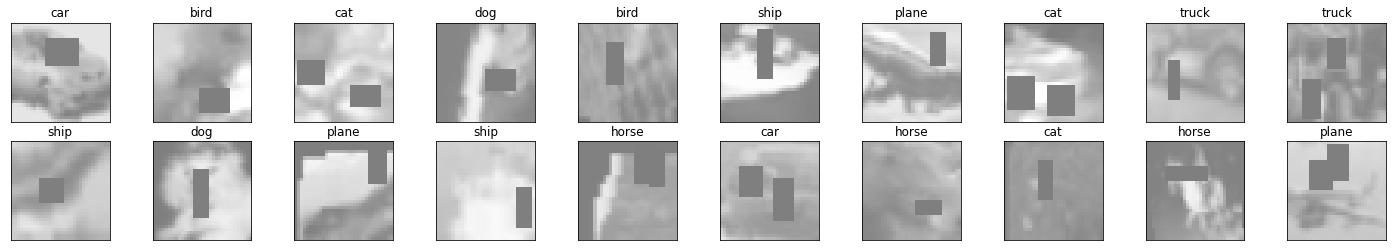

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(1, 16, 3, 1, padding=1)
      self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
      self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
      self.conv4 = nn.Conv2d(64, 128, 3, 1, padding=1)
      self.conv5 = nn.Conv2d(128, 256, 3, 1, padding=1)
      self.conv6 = nn.Conv2d(256, 512, 3, 1, padding=1)
      self.fc1 = nn.Linear(4*4*512, 1000)
      self.dropout1 = nn.Dropout(0.2)
      self.dropout4 = nn.Dropout(0.33)
      self.dropout5 = nn.Dropout(0.8)
      self.fc2 = nn.Linear(1000, 200)
      self.fc3 = nn.Linear(200, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.relu(self.conv2(x))
      x = self.dropout1(x)
      x = F.max_pool2d(x, 2, 2)

      x = F.relu(self.conv3(x))
      x = F.relu(self.conv4(x))
      x = self.dropout1(x)
      x = F.max_pool2d(x, 2, 2)

      x = F.relu(self.conv5(x))
      x = F.relu(self.conv6(x))
      x = self.dropout1(x)
      x = F.max_pool2d(x, 2, 2)

      x = x.view(-1, 4*4*512)
      x = F.relu(self.fc1(x))
      x = self.dropout4(x)
      x = F.relu(self.fc2(x))
      x = self.dropout1(x)
      x = self.fc3(x)

      
      return x

In [ ]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=1000, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout4): Dropout(p=0.33, inplace=False)
  (dropout5): Dropout(p=0.8, inplace=False)
  (fc2): Linear(in_features=1000, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Apr 14 20:07:01 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    30W / 250W |    771MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
starting_epoch = 0
epochs = 500
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    if (e+1) % 20 == 0:
      checkpoint = {
          'epoch': e + 1,
          'state_dict': model.state_dict(),
          'optimizer': optimizer.state_dict()
      }
      #save_ckp(checkpoint, e+1)

      lossframe = pd.DataFrame(running_loss_history)
      lossframe.columns = ['loss']
      lossframe = lossframe.tail(20)
      lossframe.reset_index(inplace=True,drop=True)
      val_lossframe = pd.DataFrame(val_running_loss_history)
      val_lossframe.columns = ['val_loss']
      val_lossframe = val_lossframe.tail(20)
      val_lossframe.reset_index(inplace=True,drop=True)

      accframe = pd.DataFrame(running_corrects_history)
      accframe.columns = ['accuracy']
      accframe = accframe.tail(20)
      accframe.reset_index(inplace=True,drop=True)
      val_accframe = pd.DataFrame(val_running_corrects_history)
      val_accframe.columns = ['val_accuracy']
      val_accframe = val_accframe.tail(20)
      val_accframe.reset_index(inplace=True,drop=True)

      epochframe = pd.DataFrame(range((e+1)-20,(e+1)))
      epochframe.columns = ['epoch']

      resultframe = pd.concat((epochframe,lossframe,val_lossframe,accframe,val_accframe),axis=1)
      resultframe['epoch'] = resultframe['epoch']+1
      #resultframe.to_csv('/content/drive/My Drive/checkpointframes/frame_'+str((e+1))+'.csv')

    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))




epoch : 1
training loss: 2.2226, acc 16.9380 
validation loss: 2.0649, validation acc 25.2900 
epoch : 2
training loss: 2.0963, acc 23.1120 
validation loss: 1.9351, validation acc 30.7000 
epoch : 3
training loss: 2.0388, acc 25.4820 
validation loss: 1.8449, validation acc 33.4900 
epoch : 4
training loss: 2.0017, acc 26.8400 
validation loss: 1.7840, validation acc 35.7200 
epoch : 5
training loss: 1.9710, acc 28.2360 
validation loss: 1.7517, validation acc 37.5800 
epoch : 6
training loss: 1.9481, acc 29.3080 
validation loss: 1.7159, validation acc 39.5900 
epoch : 7
training loss: 1.9116, acc 30.8540 
validation loss: 1.6637, validation acc 40.7200 
epoch : 8
training loss: 1.8916, acc 31.8880 
validation loss: 1.6300, validation acc 41.8200 
epoch : 9
training loss: 1.8636, acc 32.8580 
validation loss: 1.5864, validation acc 42.4100 
epoch : 10
training loss: 1.8448, acc 33.6180 
validation loss: 1.6151, validation acc 42.3000 
epoch : 11
training loss: 1.8270, acc 34.5220 
va

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

NameError: ignored

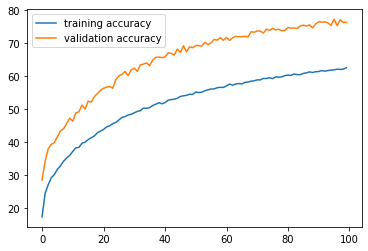

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
#test continue
starting_epoch = 100

def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']

model = model
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
ckp_path = "/content/drive/My Drive/checkpoints/checkpoint_epoch_"+str(starting_epoch)+".pt"
model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)

epochs = 100
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  new_e = starting_epoch+(e+1)
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    if new_e % 20 == 0:
      checkpoint = {
          'epoch': new_e,
          'state_dict': model.state_dict(),
          'optimizer': optimizer.state_dict()
      }
      save_ckp(checkpoint, new_e)

      lossframe = pd.DataFrame(running_loss_history)
      lossframe.columns = ['loss']
      lossframe = lossframe.tail(20)
      lossframe.reset_index(inplace=True,drop=True)
      val_lossframe = pd.DataFrame(val_running_loss_history)
      val_lossframe.columns = ['val_loss']
      val_lossframe = val_lossframe.tail(20)
      val_lossframe.reset_index(inplace=True,drop=True)

      accframe = pd.DataFrame(running_corrects_history)
      accframe.columns = ['accuracy']
      accframe = accframe.tail(20)
      accframe.reset_index(inplace=True,drop=True)
      val_accframe = pd.DataFrame(val_running_corrects_history)
      val_accframe.columns = ['val_accuracy']
      val_accframe = val_accframe.tail(20)
      val_accframe.reset_index(inplace=True,drop=True)

      epochframe = pd.DataFrame(range((new_e)-20,(new_e)))
      epochframe.columns = ['epoch']

      resultframe = pd.concat((epochframe,lossframe,val_lossframe,accframe,val_accframe),axis=1)
      resultframe['epoch'] = resultframe['epoch']+1
      resultframe.to_csv('/content/drive/My Drive/checkpointframes/frame_'+str((new_e))+'.csv')

    print('epoch :', (new_e))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))


epoch : 101
training loss: 1.0734, acc 62.8560 
validation loss: 0.7100, validation acc 76.6200 
epoch : 102
training loss: 1.0815, acc 62.3500 
validation loss: 0.6914, validation acc 77.1900 
epoch : 103
training loss: 1.0720, acc 62.9080 
validation loss: 0.7094, validation acc 76.9000 
epoch : 104
training loss: 1.0719, acc 62.8300 
validation loss: 0.6954, validation acc 77.7100 
epoch : 105
training loss: 1.0631, acc 62.9240 
validation loss: 0.6810, validation acc 77.7300 
epoch : 106
training loss: 1.0669, acc 62.8360 
validation loss: 0.6986, validation acc 77.0700 
epoch : 107
training loss: 1.0610, acc 63.4160 
validation loss: 0.7370, validation acc 76.3300 
epoch : 108
training loss: 1.0643, acc 62.9860 
validation loss: 0.6850, validation acc 78.0200 
epoch : 109
training loss: 1.0587, acc 63.2240 
validation loss: 0.6936, validation acc 77.5700 
epoch : 110
training loss: 1.0574, acc 63.2620 
validation loss: 0.7151, validation acc 77.0200 
epoch : 111
training loss: 1.0

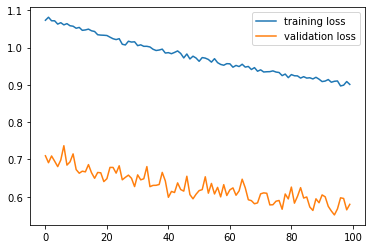

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

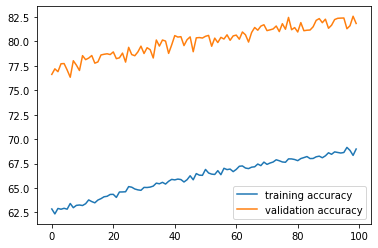

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
#test continue
starting_epoch = 1000

def load_ckp(checkpoint_fpath, model, optimizer):
    checkpoint = torch.load(checkpoint_fpath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model, optimizer, checkpoint['epoch']

model = model
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
ckp_path = "/content/drive/My Drive/checkpoints/checkpoint_epoch_"+str(starting_epoch)+".pt"
model, optimizer, start_epoch = load_ckp(ckp_path, model, optimizer)

epochs = 300
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  new_e = starting_epoch+(e+1)
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    if new_e % 20 == 0:
      checkpoint = {
          'epoch': new_e,
          'state_dict': model.state_dict(),
          'optimizer': optimizer.state_dict()
      }
      save_ckp(checkpoint, new_e)

      lossframe = pd.DataFrame(running_loss_history)
      lossframe.columns = ['loss']
      lossframe = lossframe.tail(20)
      lossframe.reset_index(inplace=True,drop=True)
      val_lossframe = pd.DataFrame(val_running_loss_history)
      val_lossframe.columns = ['val_loss']
      val_lossframe = val_lossframe.tail(20)
      val_lossframe.reset_index(inplace=True,drop=True)

      accframe = pd.DataFrame(running_corrects_history)
      accframe.columns = ['accuracy']
      accframe = accframe.tail(20)
      accframe.reset_index(inplace=True,drop=True)
      val_accframe = pd.DataFrame(val_running_corrects_history)
      val_accframe.columns = ['val_accuracy']
      val_accframe = val_accframe.tail(20)
      val_accframe.reset_index(inplace=True,drop=True)

      epochframe = pd.DataFrame(range((new_e)-20,(new_e)))
      epochframe.columns = ['epoch']

      resultframe = pd.concat((epochframe,lossframe,val_lossframe,accframe,val_accframe),axis=1)
      resultframe['epoch'] = resultframe['epoch']+1
      resultframe.to_csv('/content/drive/My Drive/checkpointframes/frame_'+str((new_e))+'.csv')

    print('epoch :', (new_e))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))


epoch : 1001
training loss: 0.6256, acc 78.5620 
validation loss: 0.5677, validation acc 86.1900 
epoch : 1002
training loss: 0.6239, acc 78.7420 
validation loss: 0.5666, validation acc 85.8300 
epoch : 1003
training loss: 0.6207, acc 78.7960 
validation loss: 0.5984, validation acc 85.4100 
epoch : 1004
training loss: 0.6254, acc 78.6000 
validation loss: 0.5775, validation acc 86.0500 
epoch : 1005
training loss: 0.6280, acc 78.3900 
validation loss: 0.5768, validation acc 85.6700 
epoch : 1006
training loss: 0.6247, acc 78.5820 
validation loss: 0.5697, validation acc 86.0200 
epoch : 1007
training loss: 0.6252, acc 78.6280 
validation loss: 0.5754, validation acc 85.7600 
epoch : 1008
training loss: 0.6211, acc 78.8520 
validation loss: 0.5691, validation acc 85.9600 
epoch : 1009
training loss: 0.6179, acc 78.7880 
validation loss: 0.5640, validation acc 86.1100 
epoch : 1010
training loss: 0.6241, acc 78.6040 
validation loss: 0.6022, validation acc 85.7000 
epoch : 1011
trainin

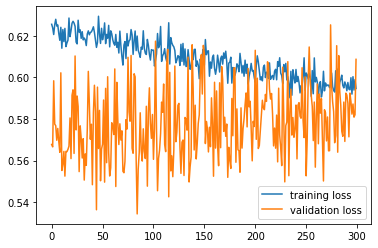

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

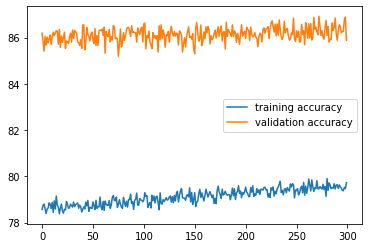

In [ ]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [ ]:
#!pip3 install pillow==4.0.0

In [ ]:
import PIL.ImageOps

car


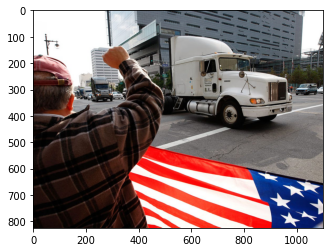

In [ ]:
import requests
from PIL import Image

#url = 'https://c8.alamy.com/comp/DYC06A/hornless-reindeer-at-zoo-DYC06A.jpg'
url = 'https://i.insider.com/5ba5241a8cec63b91a8b456b?width=1100&format=jpeg&auto=webp'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
img = transform(img)
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

tensor([[-0.3991, -7.9459,  5.7102,  0.3457, 10.6122, -0.5660,  3.6165,  0.0168,
         -7.0666, -7.7885]], device='cuda:0', grad_fn=<AddmmBackward>)
deer


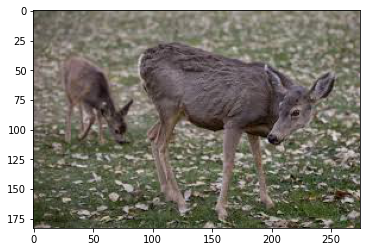

In [ ]:
import requests
from PIL import Image

#url = 'https://c8.alamy.com/comp/DYC06A/hornless-reindeer-at-zoo-DYC06A.jpg'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRaI0kFdQQPMhVRmB6_jrjx_EFnealbvjlk7mtRSh-s8hQexlEO&usqp=CAU'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
img = transform(img)
image = img.to(device).unsqueeze(0)
output = model(image)
print(output)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

tensor([[-0.7234, -1.8556, -3.5648, -0.0662,  6.6908, -6.2928, -0.8655,  0.5652,
         -2.0108,  0.0458]], device='cuda:0', grad_fn=<AddmmBackward>)
deer


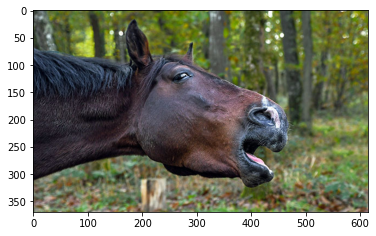

In [ ]:
import requests
from PIL import Image

#url = 'https://c8.alamy.com/comp/DYC06A/hornless-reindeer-at-zoo-DYC06A.jpg'
url = 'https://vetmed.illinois.edu/wp-content/uploads/2018/05/Madsen-horse-cough.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
img = transform(img)
image = img.to(device).unsqueeze(0)
output = model(image)
print(output)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

cat


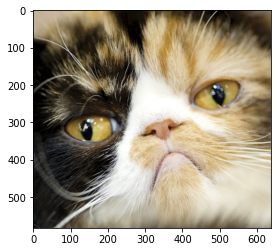

In [ ]:
import requests
from PIL import Image

#url = 'https://c8.alamy.com/comp/DYC06A/hornless-reindeer-at-zoo-DYC06A.jpg'
url = 'https://geniusvets.s3.amazonaws.com/gv-cat-breeds/Exotic-Shorthair-4.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)
img = transform(img)
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

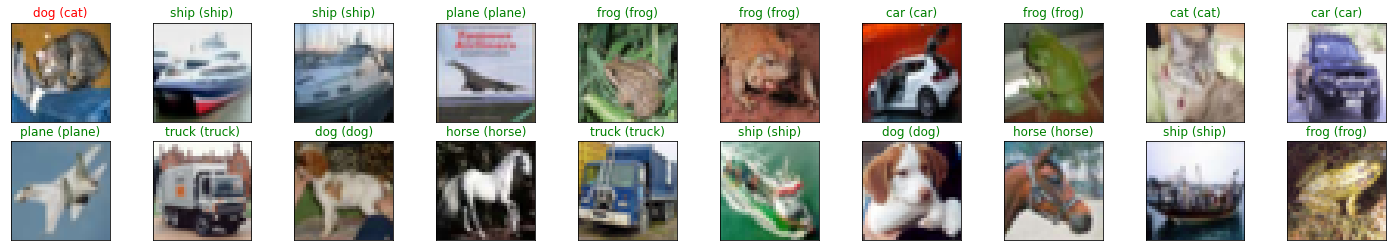

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

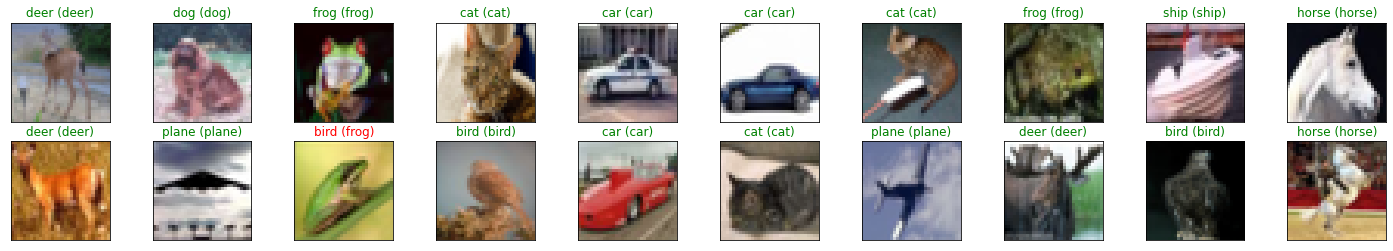

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

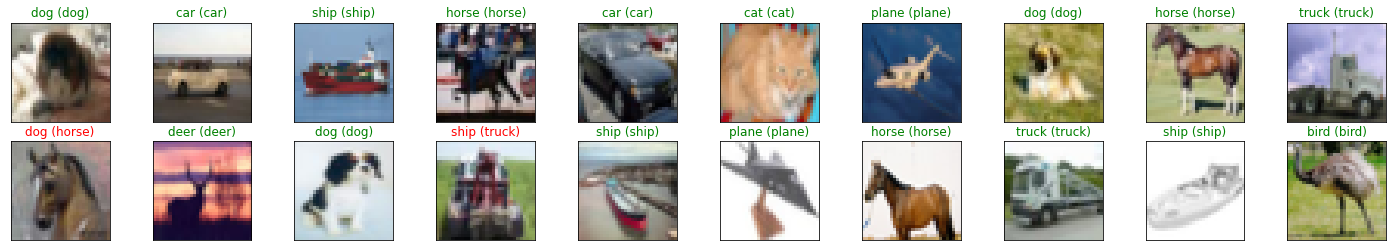

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

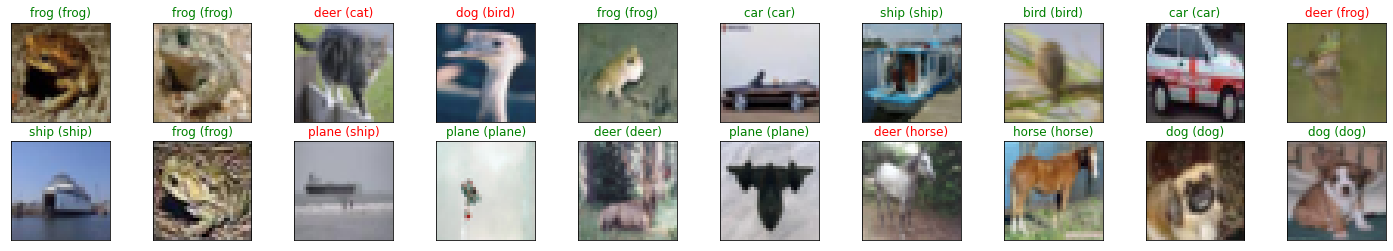

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

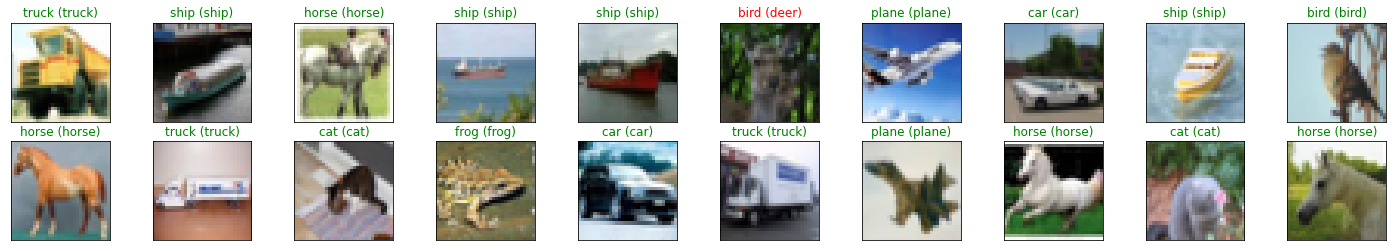

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

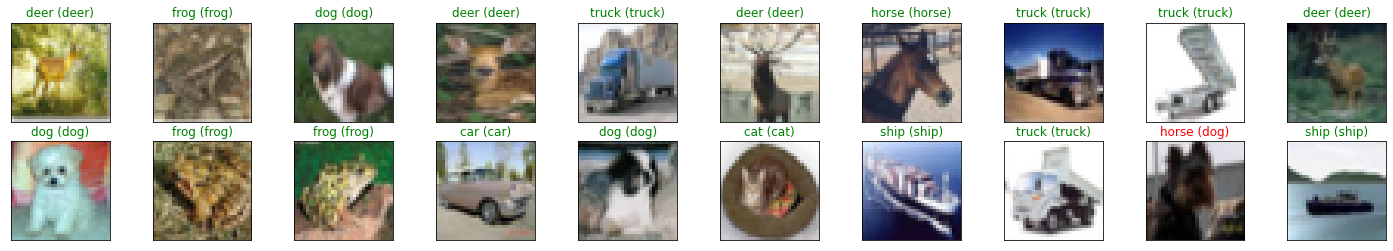

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

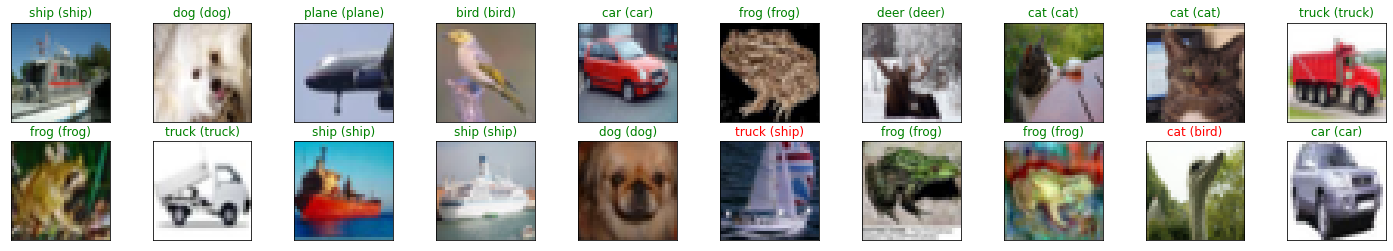

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

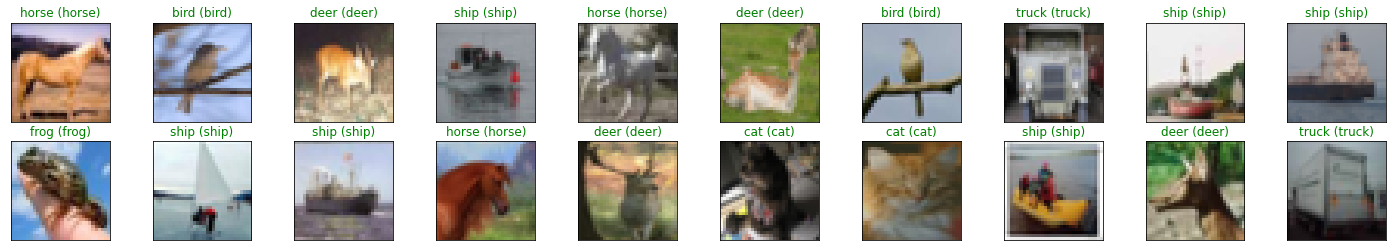

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

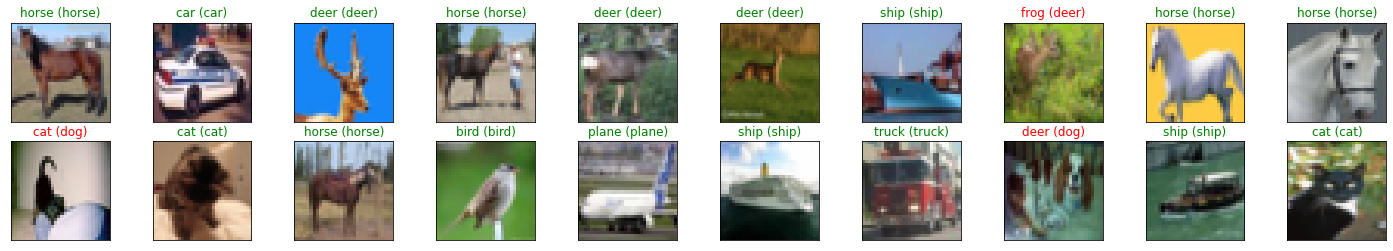

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

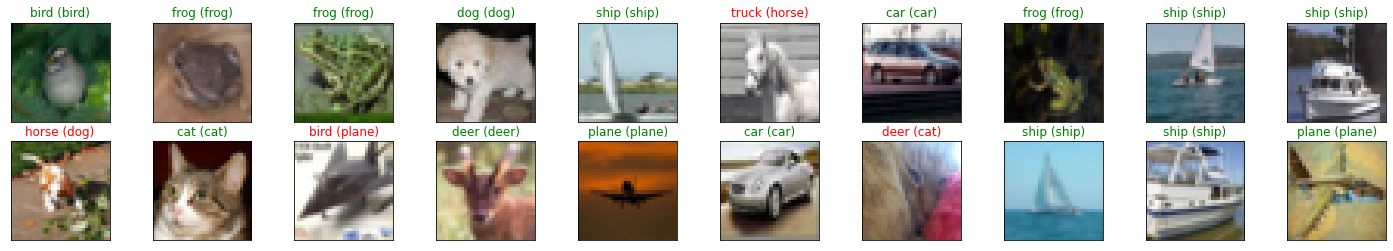

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

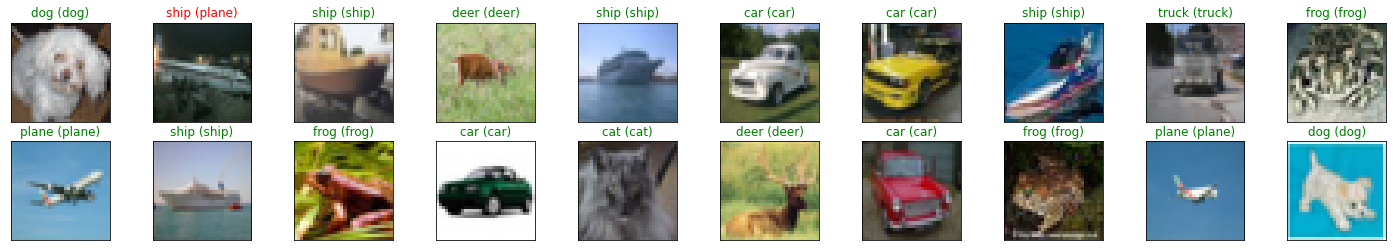

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

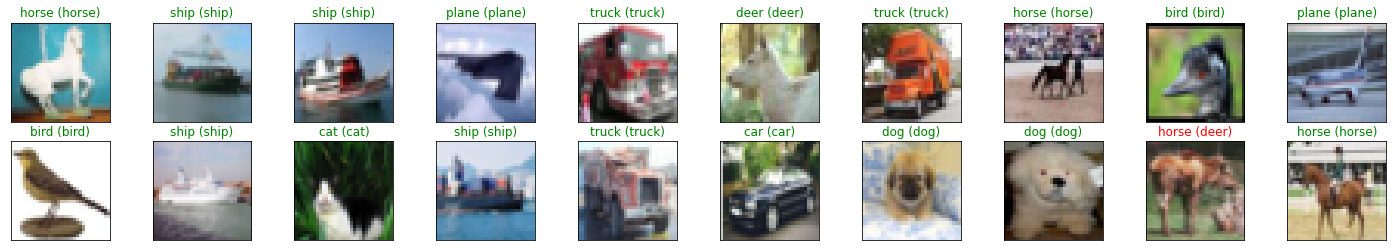

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

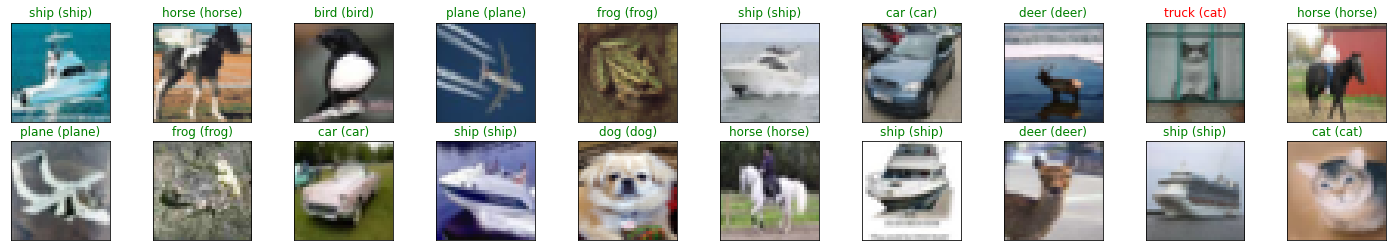

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

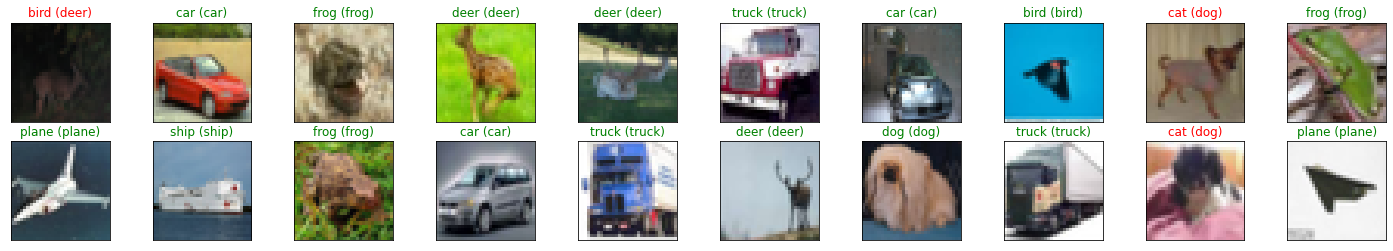

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()
images, labels = dataiter.next()

images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))

In [ ]:
!ls '/content/drive/My Drive/checkpointframes'

frame_1000.csv	frame_1220.csv	frame_280.csv  frame_520.csv  frame_760.csv
frame_100.csv	frame_1240.csv	frame_300.csv  frame_540.csv  frame_780.csv
frame_1020.csv	frame_1260.csv	frame_320.csv  frame_560.csv  frame_800.csv
frame_1040.csv	frame_1280.csv	frame_340.csv  frame_580.csv  frame_80.csv
frame_1060.csv	frame_1300.csv	frame_360.csv  frame_600.csv  frame_820.csv
frame_1080.csv	frame_140.csv	frame_380.csv  frame_60.csv   frame_840.csv
frame_1100.csv	frame_160.csv	frame_400.csv  frame_620.csv  frame_860.csv
frame_1120.csv	frame_180.csv	frame_40.csv   frame_640.csv  frame_880.csv
frame_1140.csv	frame_200.csv	frame_420.csv  frame_660.csv  frame_900.csv
frame_1160.csv	frame_20.csv	frame_440.csv  frame_680.csv  frame_920.csv
frame_1180.csv	frame_220.csv	frame_460.csv  frame_700.csv  frame_940.csv
frame_1200.csv	frame_240.csv	frame_480.csv  frame_720.csv  frame_960.csv
frame_120.csv	frame_260.csv	frame_500.csv  frame_740.csv  frame_980.csv


In [ ]:
start = pd.read_csv('/content/drive/My Drive/checkpointframes/frame_320.csv')
for num in range(340,1301,20):
  temp = pd.read_csv('/content/drive/My Drive/checkpointframes/frame_'+str(num)+'.csv')
  if num == 40:
    dataset = pd.concat((start, temp),axis=0)
  else:
    dataset = pd.concat((temp, dataset),axis=0)
dataset = dataset.sort_values(by='epoch',ascending=True)

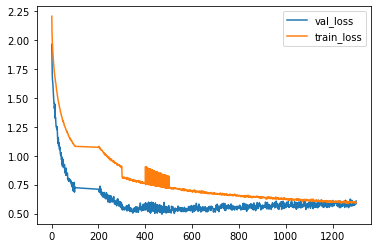

In [ ]:
#plt.plot(dataset.epochs, label='epochs')
plt.plot(dataset.epoch, dataset.val_loss, label='val_loss')
plt.plot(dataset.epoch, dataset.loss, label='train_loss')
plt.legend()

In [ ]:
import re
dataset['acc'] = dataset['accuracy'].astype(str).str.split(',', expand=True)
dataset['acc'] = dataset['acc'].astype(str).str.split('(', 1)
dataset['acc'] = dataset['acc'].apply(lambda x: re.sub("[^0-9.]", "",str(x)))

In [ ]:
dataset['val_acc'] = dataset['val_accuracy'].astype(str).str.split(',', expand=True)
dataset['val_acc'] = dataset['val_acc'].astype(str).str.split('(', 1)
dataset['val_acc'] = dataset['val_acc'].apply(lambda x: re.sub("[^0-9.]", "",str(x)))


In [ ]:
dataset.head(3)

,Unnamed: 0,epoch,loss,val_loss,accuracy,val_accuracy,acc,val_acc
0,0,1,2.208332,1.965239,"tensor(17.2580, device='cuda:0')","tensor(28.4900, device='cuda:0')",17.2580,28.4900
1,1,2,2.065788,1.823281,"tensor(24.3920, device='cuda:0')","tensor(34.1900, device='cuda:0')",24.3920,34.1900
2,2,3,1.998930,1.706578,"tensor(27.0300, device='cuda:0')","tensor(37.9500, device='cuda:0')",27.0300,37.9500


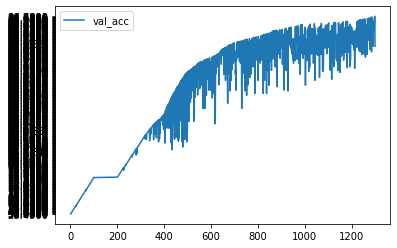

In [ ]:
#plt.plot(dataset.epochs, label='epochs')
plt.plot(dataset.epoch,dataset.val_acc, label='val_acc')
#plt.plot(dataset.epoch,dataset.acc, label='train_acc')
plt.legend()